In [1]:
import os

import matplotlib.pyplot as plt

from glob import glob
from image.default import locations
from image.image_loader import ImageManager




Using TensorFlow backend.


In [4]:
imagepaths = []
image_folder = locations['datasets']['intel']['train']
categories = ['buildings', 'forest', 'glacier', 'mountain', 'sea']

for cat in categories:
    temp_dir = os.path.join(image_folder, cat, "**")
    images = glob(temp_dir)
    imagepaths.extend(images)

In [13]:
server = ImageManager(
    imagepaths=imagepaths,
    sample_size=200
)

# Trying to serve the images here

(<matplotlib.image.AxesImage at 0x7fbe8427b750>, 1, 'mountain')

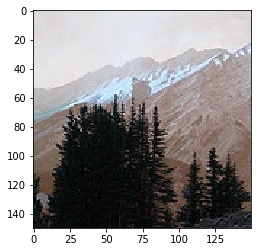

In [15]:
# Assiging the images their labels
image_label = server.current_image_index
label = server.paths[image_label].split("/")[-2]
server.give_label(image_label, label)

#  Serving the image
image = server.serveimage()
plt.imshow(image), image_label, label

# Hacving a look at how the labels are stored

In [16]:
server.image_df.head()

,image,label
0,/home/dumbmachine/demos/collab_demo/data/image...,mountain
1,/home/dumbmachine/demos/collab_demo/data/image...,mountain
2,/home/dumbmachine/demos/collab_demo/data/image...,None
3,/home/dumbmachine/demos/collab_demo/data/image...,None
4,/home/dumbmachine/demos/collab_demo/data/image...,None


# Auto labelling for 200 images

In [17]:
server.skip_images(200), server.current_image_index

(None, 202)

In [18]:
server.image_df.head()

,image,label
0,/home/dumbmachine/demos/collab_demo/data/image...,mountain
1,/home/dumbmachine/demos/collab_demo/data/image...,mountain
2,/home/dumbmachine/demos/collab_demo/data/image...,mountain
3,/home/dumbmachine/demos/collab_demo/data/image...,buildings
4,/home/dumbmachine/demos/collab_demo/data/image...,sea


# Building the dataset from the available number of images